# Installation of Packages

First install packages like numpy, scikit-learn, matplotlib

In [1]:
!pip install numpy scikit-learn matplotlib

## Importation of packages

We import the necessary packages

In [2]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Dataset

We load the necessary IRIS dataset. 

In [3]:
iris = datasets.load_iris()

## Description of the Dataset

### Input features

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Target feature

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Verify number of records

In [6]:
print(f"Number of Input Records: {len(iris.data)}")
print(f"Number of Target Records: {len(iris.target)}")

Number of Input Records: 150
Number of Target Records: 150


## Visulizing the dataset

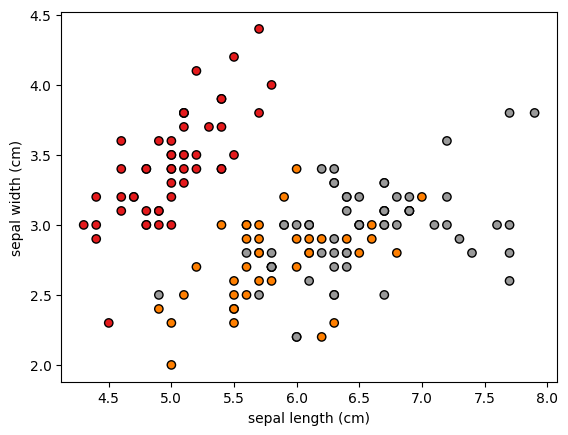

In [7]:
x = iris.data
y = iris.target

plot.scatter(x[:, 0], x[:, 1], c=y, cmap=plot.cm.Set1, edgecolor="k")
plot.xlabel(iris.feature_names[0])
plot.ylabel(iris.feature_names[1])
plot.show()

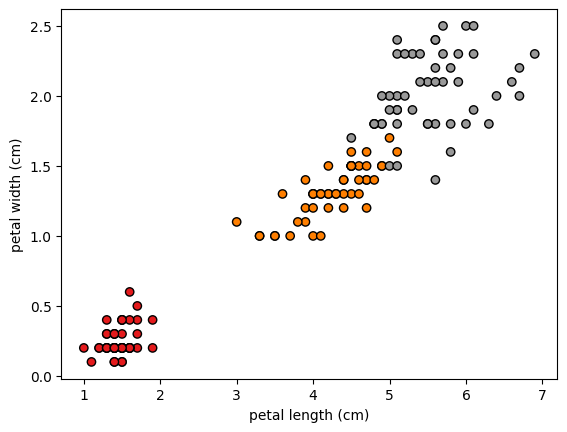

In [8]:
plot.scatter(x[:, 2], x[:, 3], c=y, cmap=plot.cm.Set1, edgecolor="k")
plot.xlabel(iris.feature_names[2])
plot.ylabel(iris.feature_names[3])
plot.show()

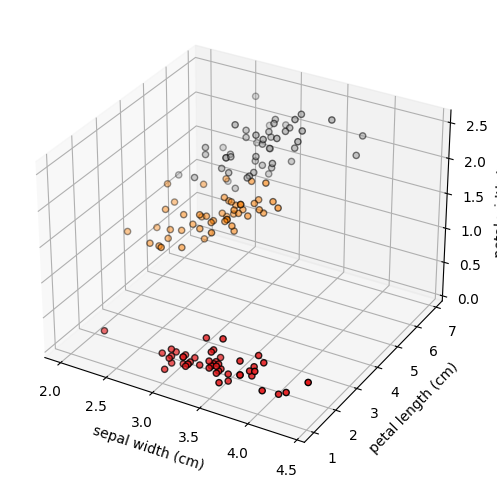

In [9]:
fig = plot.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.scatter(x[:, 1], x[:, 2], x[:, 3], c=y, cmap=plot.cm.Set1, edgecolor="k")
ax.set_xlabel(iris.feature_names[1])
ax.set_ylabel(iris.feature_names[2])
ax.set_zlabel(iris.feature_names[3])
plot.show()

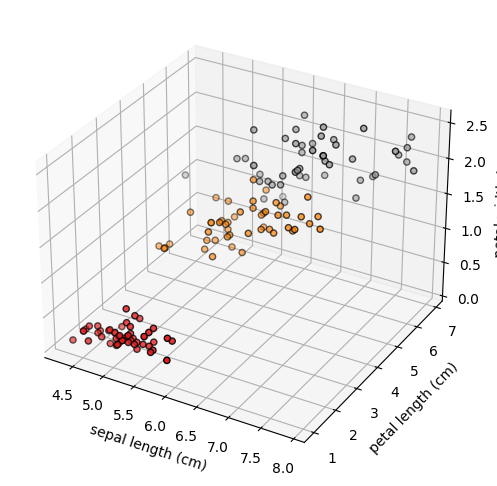

In [10]:
fig = plot.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.scatter(x[:, 0], x[:, 2], x[:, 3], c=y, cmap=plot.cm.Set1, edgecolor="k")
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[2])
ax.set_zlabel(iris.feature_names[3])
plot.show()

## Training

In [11]:
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, random_state=12, stratify=y
)

In [12]:
print(f"Number of Training Records (input): {len(x_train)}")
print(f"Number of Training Records (target): {len(y_train)}")

print(f"Number of Test Records (input): {len(x_test)}")
print(f"Number of Test Records (input): {len(x_test)}")

Number of Training Records (input): 105
Number of Training Records (target): 105
Number of Test Records (input): 45
Number of Test Records (input): 45


## Standardization of features 

In [13]:
sc = StandardScaler()
sc.fit(x_train)
print(f"Mean: {sc.mean_} \nVariance={sc.var_}")

Mean: [5.8247619  3.07238095 3.73238095 1.19142857] 
Variance=[0.59367256 0.20790385 2.950761   0.55849796]


In [14]:
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [15]:
classifier = Perceptron(max_iter=100, eta0=0.1, random_state=12)

# training
classifier.fit(x_train_std, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=12)

## Classification report

In [16]:
predicted_target = classifier.predict(x_test_std)

# classification report
print(metrics.classification_report(y_test, predicted_target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Confusion matrix

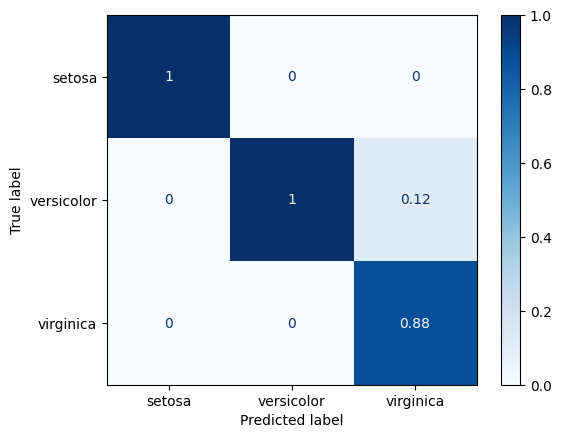

In [17]:
cm = confusion_matrix(y_test, predicted_target, normalize="pred")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plot.cm.Blues)

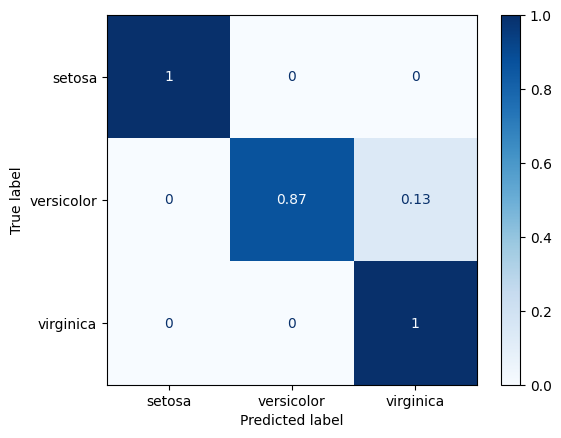

In [18]:
cm = confusion_matrix(y_test, predicted_target, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plot.cm.Blues)

## References

- [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
- [3D scatterplot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Iris classification with sklearn perceptron](https://www.kaggle.com/code/choihanbin/iris-classification-with-sklearn-perceptron)
- [plot_confusion_matrix without estimator](https://stackoverflow.com/questions/60776749/plot-confusion-matrix-without-estimator)